<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_07_KNearest_Neighbors/K_Nearest_Neighbors_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Introduction

## How KNN works

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import model_selection
from sklearn import datasets
from sklearn import metrics

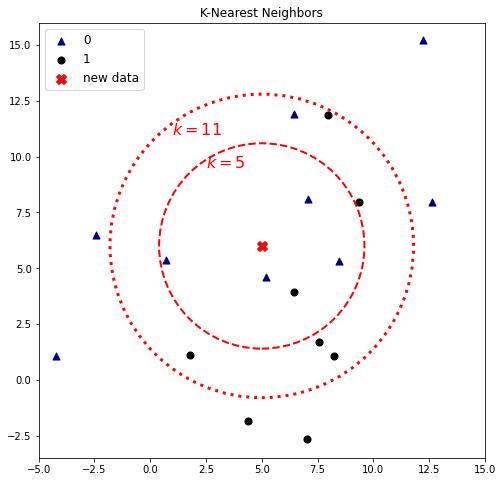

In [ ]:
r = [4.6, 6.8]
k = [5, 11]
X, y = make_blobs(n_samples=30, centers=2, cluster_std=6.0, random_state=8)
X = np.float32(X)
A = X[y.ravel()==0]
B = X[y.ravel()==1]
plt.figure(figsize=(8, 8))
plt.scatter(A[:, 0], A[:, 1], marker='^', s=50, c='navy', label='0')
plt.scatter(B[:, 0], B[:, 1], marker='o', s=50, c='black', label='1')
new_point = np.array([[5.0, 6.0]])
plt.scatter(new_point[:, 0], new_point[:, 1], s=100, marker='X', c='r', label='new data')
circle1 = plt.Circle((new_point[:, 0], new_point[:, 1]), r[0], color='r', lw=2, ls='--', fill=False)
circle2 = plt.Circle((new_point[:, 0], new_point[:, 1]), r[1], color='r', lw=3, ls=':', fill=False)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.text(2.5, 9.5, r"$k=" + str(k[0])+"$", fontsize=16, c='r')
plt.text(1.0, 11.0, r"$k=" + str(k[1])+"$", fontsize=16, c='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim((-2.5, 15))
plt.xlim((-5, 15))
plt.legend(loc='best', fontsize=12)
plt.title("K-Nearest Neighbors")
plt.savefig("knn_introduction.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()


In [3]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
predicted = knn.predict(new_point)
print("New data at", new_point[0], 
      "is classified as:", predicted.item())

New data at [5. 6.] is classified as: 0


In [4]:
neighbors = knn.kneighbors(new_point)
print("Distances to the %d neighbors:\n"%k, neighbors[0])
print("Data points of %d neighbors:\n"%k, neighbors[1])

Distances to the 5 neighbors:
 [[1.3930841  2.53372304 2.96550126 3.50262377 4.31519223]]
Data points of 5 neighbors:
 [[28 18 25 22  5]]


In [5]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
predicted = knn.predict(new_point)
print("New data at", new_point[0], 
      "is classified as:", predicted.item())
neighbors = knn.kneighbors(new_point)
print("Distances to the %d neighbors:\n"%k, neighbors[0])
print("Data points of %d neighbors:\n"%k, neighbors[1])

New data at [5. 6.] is classified as: 1
Distances to the 11 neighbors:
 [[1.3930841  2.53372304 2.96550126 3.50262377 4.31519223 4.79025696
  5.00278133 5.84433407 5.90233902 6.0839032  6.5816414 ]]
Data points of 11 neighbors:
 [[28 18 25 22  5 13  7 26  9  6 24]]


## Iris Dataset

In [6]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data, 
                                 iris.target, 
                                 train_size = .75, 
                                 random_state=0)
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 0.9736842105263158
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Handwritten Digits Dataset

Load dataset and randomely show 100 digits (optional):

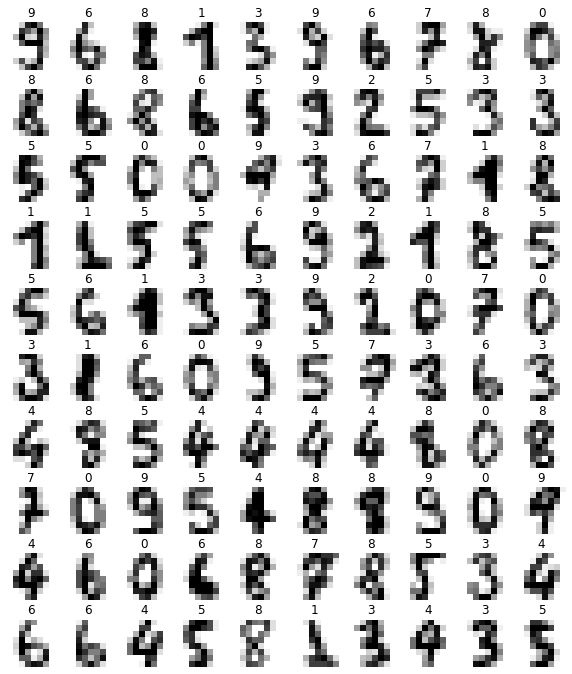

In [7]:
digits = datasets.load_digits()
fig = plt.figure(figsize=(10,12))
for i in range(100):
    idx = np.random.randint(digits.images.shape[0])
    plt.subplot(10,10,i+1)
    plt.imshow(digits.images[idx], cmap='binary')
    plt.title(digits.target[idx])
    plt.axis('off')
plt.show()

In [8]:
X2_train, X2_test, y2_train, y2_test = \
model_selection.train_test_split(digits.data, 
                                 digits.target, 
                                 train_size = .75, 
                                 random_state=0)
k = 1
knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(X2_train, y2_train)
y2_pred = knn2.predict(X2_test)
a2_score = metrics.accuracy_score(y2_test, y2_pred)
c2_matrix = metrics.confusion_matrix(y2_test, y2_pred)
c2_report = metrics.classification_report(y2_test, y2_pred)
print("Accuracy Score:\n", a2_score)
print("Confusion matrix:\n", c2_matrix)
print("Classification Report:\n", c2_report)

Accuracy Score:
 0.9911111111111112
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97      

## How to select $k$

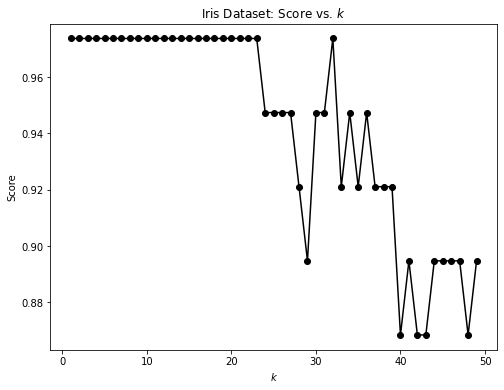

In [9]:
scores = []
max_k = 50
for k in range(1, max_k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  score = knn.score(X_test, y_test)
  scores.append(score)
plt.figure(figsize=(8,6))
plt.plot(range(1, max_k), scores, c='k', marker='o')
plt.title(r'Iris Dataset: Score vs. $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.show()

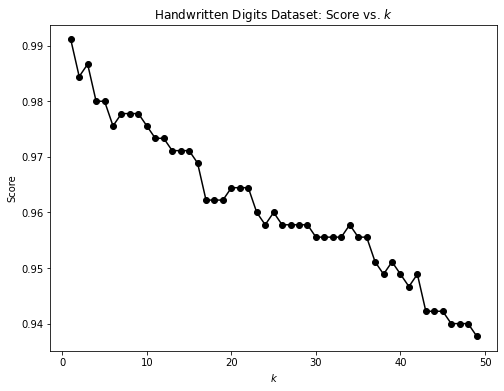

In [10]:
scores2 = []
max_k = 50
for k in range(1, max_k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X2_train,y2_train)
  score = knn.score(X2_test, y2_test)
  scores2.append(score)
plt.figure(figsize=(8,6))
plt.plot(range(1, max_k), scores2, c='k', marker='o')
plt.title(r'Handwritten Digits Dataset: Score vs. $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.savefig("knn_select_k.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()